#### Titanic problem using DecisionTreeClassificator

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70%; !important;}</style>"
HTML(style)

In [2]:
# Import dataset
titanic = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Handle features with null data and string values for using DecisionTree Classificator**

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1) 
y = titanic.Survived

In [5]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age':X.Age.median()}) 
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [8]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy') 

In [10]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

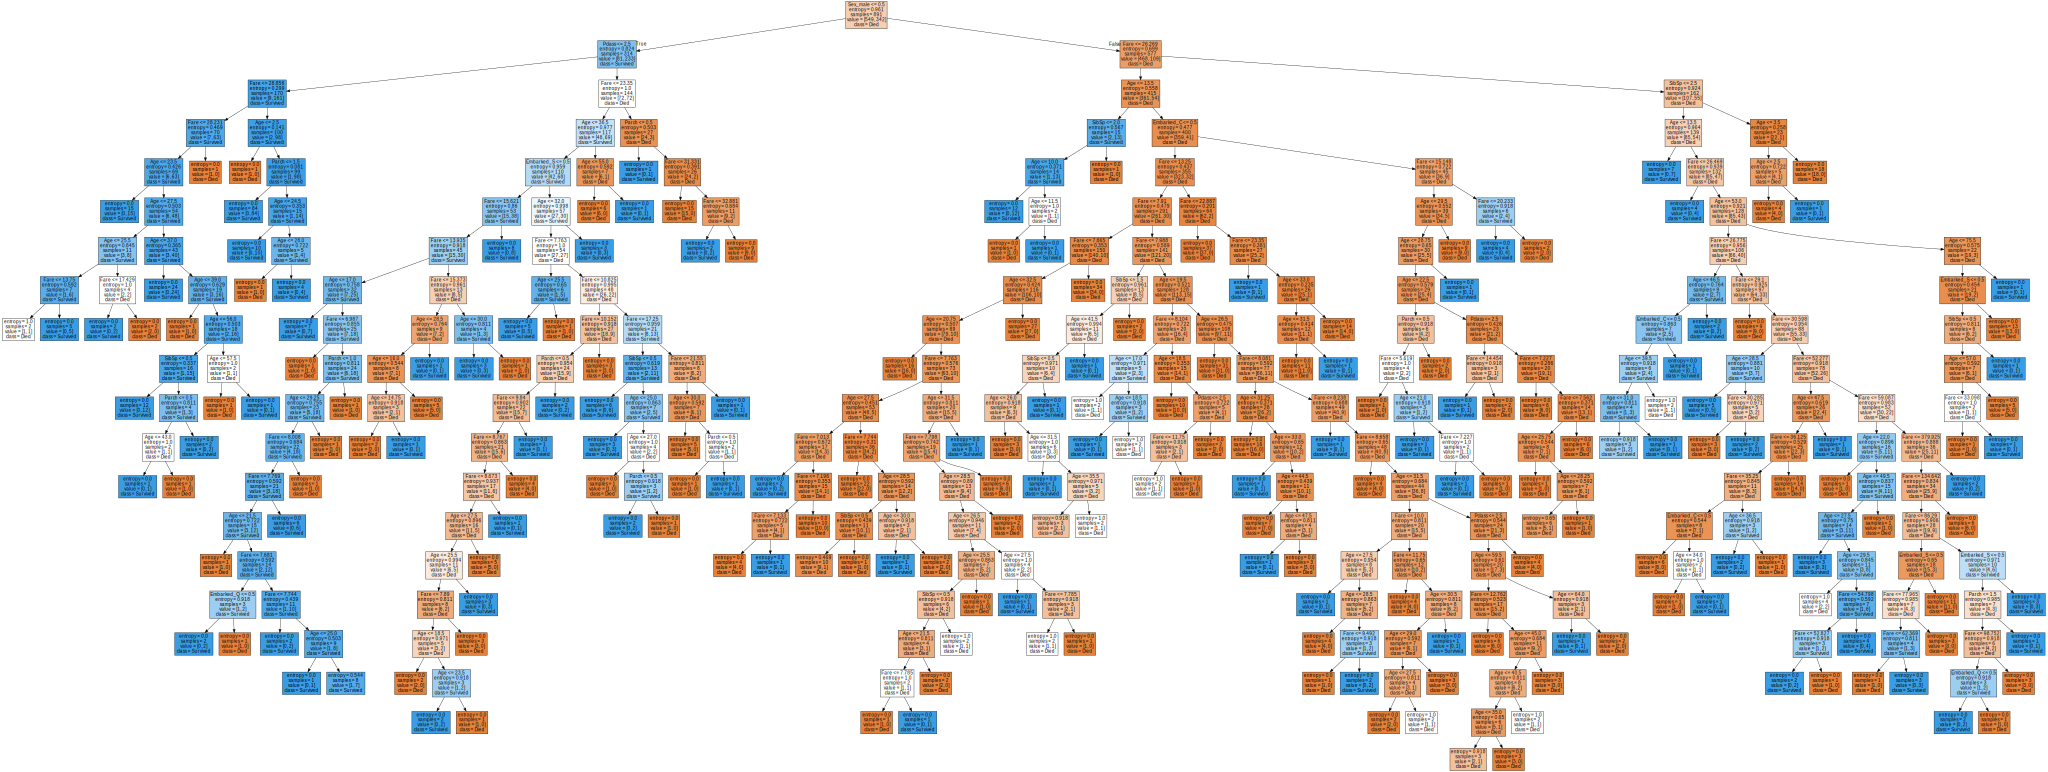

In [11]:
style = "<style>svg{width:50% !important;height:50%; !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file = None
                                   , feature_names = list(X), class_names = ['Died','Survived']
                                   , filled = True))
display(SVG(graph.pipe(format='svg')))

Tree devide until entropy  = 0 ( pure classes - only 0 or 1 in class), so take in acount all even not important features

**Split dataset on train and test**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)
X_train.shape
X_test.shape

(295, 10)

Calculate count of right answers - accuracy on train dataset

In [14]:
clf.score(X , y)

0.9797979797979798

Train Decision tree on train data

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Accuracy on train dataset

In [16]:
clf.score(X_train, y_train)

0.9798657718120806

To prevent overfitting model change max_depth

In [17]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5) 

In [20]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8406040268456376

In [21]:
clf.score(X_test, y_test)

0.8101694915254237

Find best hyperparameter  -  max_depth with best accuracy on test sample

In [22]:
scores_data = pd.DataFrame()
max_depth_values = range( 1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth) 
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score =  clf.score(X_test, y_test)
    
    tmp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score]})
    scores_data = pd.concat([scores_data, tmp_score_data], axis = 0)  

In [23]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [24]:
scores_data_long = pd.melt(scores_data, 
                                    id_vars =    ['max_depth'],
                                    value_vars = ['train_score','test_score']  ,                          
                                    var_name =   'set_type',
                                    value_name = 'score')
                                   

In [25]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot: xlabel='max_depth', ylabel='score'>

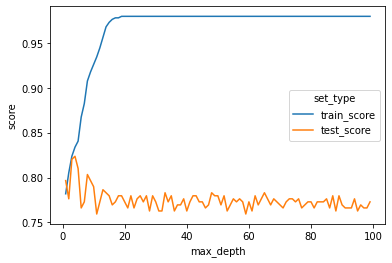

In [26]:
sns.lineplot(x="max_depth", y ="score", hue = "set_type", data = scores_data_long)

Cross validation from scikit-learn  - to prevent overfitting model.

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.7802801120448178

For each value of depth build 5 models on train sample ( 4 parts train + 1 test) and calculate average accuracy

In [29]:
scores_data = pd.DataFrame()

max_depth_values = range( 1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth) 
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score =  clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    tmp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score],
                                   'cross_val_score': [mean_cross_val_score]
                                    })
    scores_data = pd.concat([scores_data, tmp_score_data], axis = 0)  

In [30]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392


In [31]:
scores_data_long = pd.melt(scores_data, 
                                    id_vars =    ['max_depth'],
                                    value_vars = ['train_score','test_score','cross_val_score'],                          
                                    var_name =   'set_type',
                                    value_name = 'score')

In [32]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392


<AxesSubplot: xlabel='max_depth', ylabel='score'>

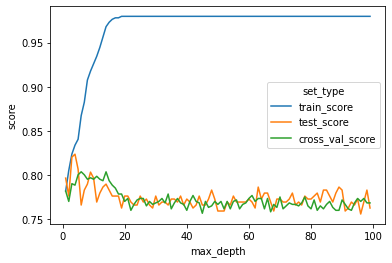

In [33]:
sns.lineplot(x="max_depth", y ="score", hue = "set_type", data = scores_data_long)

In [40]:
scores_data_long.query("set_type=='cross_val_score'").head(5)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392


In [41]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [42]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
best_clf.score(X_test, y_test)

0.8

Hyper parametrs with GridSerachCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parametrs = {'criterion':['gini','entropy'], 'max_depth': range(1,30)}

In [46]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [49]:
grid_search_cv_clf = GridSearchCV(clf , parametrs, cv = 5)

In [50]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [52]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [96]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)

In [97]:
best_clf.score(X_test, y_test) 

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
y_pred = best_clf.predict(X_test)

In [56]:
precision_score(y_test, y_pred )

0.8279569892473119

In [57]:
recall_score(y_test, y_pred)

0.6416666666666667

In [60]:
y_predicted_prob = best_clf.predict_proba(X_test) # probability to be in class 0 and 1

<AxesSubplot: >

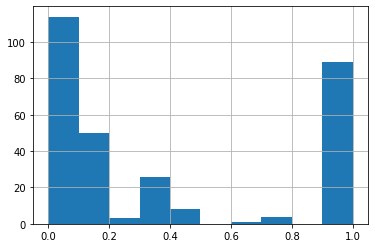

In [68]:
pd.Series(y_predicted_prob[:,1]).hist()

In [50]:
pd.Series(y_predicted_prob[:,1]).unique()

array([0.44444444, 0.25      , 0.06086957, 1.        , 0.        ,
       0.75      , 0.12      , 0.13333333, 0.33333333, 0.36842105,
       0.18181818, 0.66666667])

Choose value to devide probability on classes 0/1 depands on what metrics is more important precision or recall

In [64]:
y_pred = np.where(y_predicted_prob[:,1]>0.8 , 1 , 0 )

In [90]:
precision_score(y_test, y_pred )

0.8409090909090909

In [91]:
recall_score(y_test, y_pred )

0.6166666666666667

Choose value to devide into classes compromising between mistake 1-st 2-d type  (true/ false/ positive/negative - confusion matrix)

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn 
from sklearn.datasets import make_classification

fpr, tpr ,thresholds = roc_curve(y_test, y_predicted_prob[:,1] )
roc_auc = auc(fpr, tpr)  # compute area under the curve  
# x - fpr - fp /(fp+tn)
# y - tpr - recall - tp/(tp+fn)

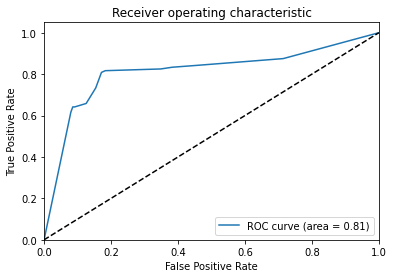

In [94]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [95]:
roc_auc

0.811952380952381